In [1]:
import pandas as pd
from pylab import rcParams
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor

# Unemployment Rate Regression Models -USA

In [4]:
df=pd.read_csv("unemp_yearly.csv", header=0, index_col=0)
df_USA2 = df[df['LOCATION']=="USA"]
df_USA2.reset_index(drop=True, inplace=True)
df_USA2 = df_USA2[df_USA2.TIME != 2020]

In [ ]:
rolling_mean = df_USA2["Value"].rolling(7).mean()
rolling_std = df_USA2["Value"].rolling(7).std()
plt.plot(df_USA2["TIME"],df_USA2["Value"], color = 'blue', label = 'Original')
plt.plot(df_USA2["TIME"],rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(df_USA2["TIME"],rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
result = adfuller(df_USA2["Value"])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

In [ ]:
sm.graphics.tsa.plot_acf(df_USA2["Value"].squeeze())
plt.show()

In [ ]:
sm.graphics.tsa.plot_pacf(df_USA2["Value"].squeeze())
plt.show()

# ARIMA Model

c:\users\anand\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\anand\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: 

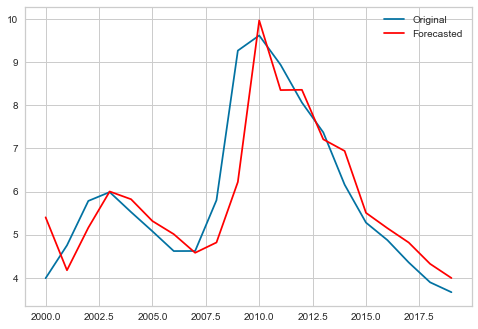

In [7]:
#decomposition = seasonal_decompose(df_USA2) 
model = ARIMA(df_USA2['Value'], order=(1,0,1), exog = df_USA2['TIME'])
results = model.fit(disp=0)

plt.plot(df_USA2['TIME'],df_USA2['Value'], label='Original')
plt.plot(df_USA2['TIME'],results.fittedvalues, color='red', label='Forecasted')
plt.legend(loc = 'best')
#df_USA2
#results.fittedvalues

c:\users\anand\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:827: SpecificationWarning: 
The number of observations in exog does not match the number of out-of-sample
observations.  This might indicate that exog is not correctly aligned. exog
should be aligned so that the exog[0] is used for the first out-of-sample
forecast, and exog[-1] is used for the last out-of-sample forecast.
exog is not used for in-sample observations which are the fitted values.

To silence this warning, ensure the number of observation in exog (21)
matches the number of out-of-sample forecasts (1)'

  warnings.warn(msg, SpecificationWarning)


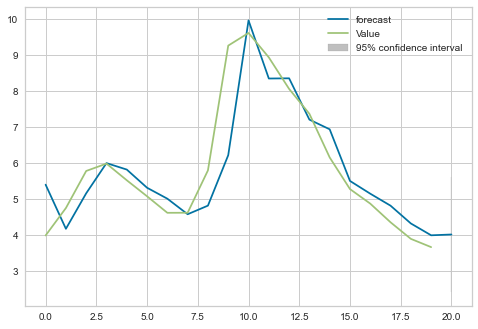

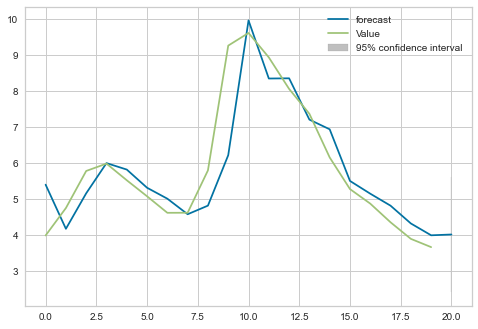

In [8]:
results.plot_predict(0,20,exog = df_USA2['TIME'])

In [9]:
results.predict(20,20,exog = df_USA2['TIME'])

c:\users\anand\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:827: SpecificationWarning: 
The number of observations in exog does not match the number of out-of-sample
observations.  This might indicate that exog is not correctly aligned. exog
should be aligned so that the exog[0] is used for the first out-of-sample
forecast, and exog[-1] is used for the last out-of-sample forecast.
exog is not used for in-sample observations which are the fitted values.

To silence this warning, ensure the number of observation in exog (21)
matches the number of out-of-sample forecasts (1)'

  warnings.warn(msg, SpecificationWarning)


20    4.013873
dtype: float64

**predicted value for the year-2020**

# Unemployment Rate Regression Models -RUSSIA

In [11]:
df=pd.read_csv('clean_unemployment.csv')

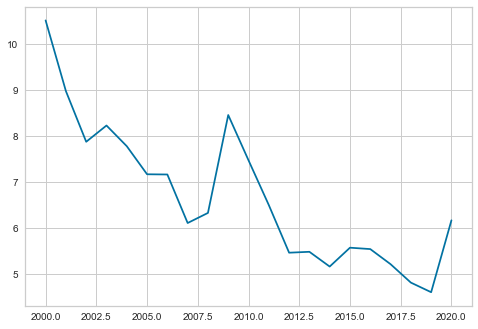

In [12]:
df=df[df['LOCATION']=='RUS']
plt.plot(df['TIME'],df['Value'])

In [13]:
x=[i for i in df['TIME']]
y=[i for i in df['Value']]
x_array=x
y_array=y
x=np.asarray(x)
y=np.asarray(y)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
l=int(len(x)*.8)
x_train,x_test=x[:l],x[l:]
y_train,y_test=y[:l],y[l:]

In [14]:
y_temp=[]
for i in y:
    y_temp.append(list(i))
y=y_temp

In [15]:
y.remove([5.56738874942334])
y.remove([5.53719568468794])

In [16]:
x=list(x)

In [17]:
x.remove([2016])
x.remove([2015])

# Polynomial regression model(degree 3)

In [18]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly, y_train)
x_test_poly=polynomial_features.fit_transform(x_test)
y_poly_pred = model.predict(x_test_poly)
rmse = np.sqrt(mean_squared_error(y_poly_pred,y_test))
r2 = r2_score(y_test,y_poly_pred)
print("rmse",rmse)
print("r2",r2)

rmse 4.5082411913695095
r2 -64.97702405546536


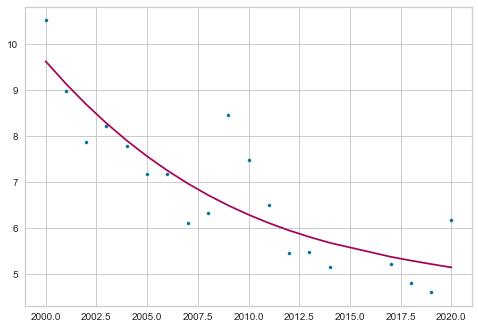

In [19]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [20]:
scaler = StandardScaler()
dataset={'x':np.asarray(x).reshape(1,len(x))[0],'y':np.asarray(y).reshape(1,len(y))[0]}
df_data=pd.DataFrame(dataset)
normalized = scaler.fit_transform(df_data)
# inverse transform
inverse = scaler.inverse_transform(normalized)
tobescaled=[]
for i in range(len(x)):
    tobescaled.append([x[i][0],y[i][0]])
tobescaled=np.asarray(tobescaled)

In [21]:
scaled = scaler.fit_transform(tobescaled)
x_scaled=[]
for i in range(len(x)):
    if(i==9):
        pass
    else:
        x_scaled.append([scaled[i][0]])
y_scaled=[]
for i in range(len(y)):
    if(i==9):
        pass
    else:
        y_scaled.append(scaled[i][1])
l=int(len(x)*.8)
x_scaled=x_scaled[:-1]
y_scaled=y_scaled[:-1]
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]

# Support Vector Regression (SVR)

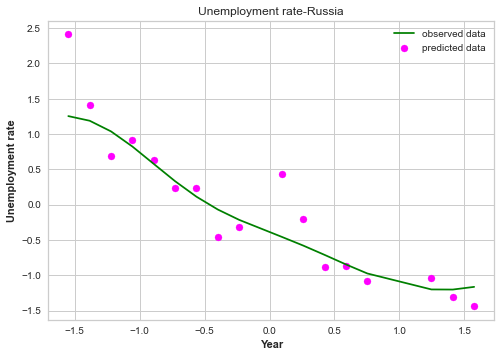

rmse 0.42365358522549046
r2 0.8023130709471873


In [22]:
regressor = SVR(kernel='rbf')
regressor.fit(x_scaled,y_scaled)
y_pred = regressor.predict(x_scaled)
plt.scatter(x_scaled, y_scaled, color = 'magenta')
plt.plot(x_scaled, regressor.predict(x_scaled), color = 'green')
plt.title('Unemployment rate-Russia')
plt.legend(['observed data','predicted data'])
plt.xlabel('Year', fontweight ='bold') 
plt.ylabel('Unemployment rate', fontweight ='bold')
plt.show()
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]
y_svr_pred=regressor.predict(x_test)
rmse = np.sqrt(mean_squared_error(regressor.predict(x_train),y_train))
r2 = r2_score(y_train,regressor.predict(x_train))
print("rmse",rmse)
print("r2",r2)

In [26]:
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]
y_svr_pred=regressor.predict(x_test)
rmse = np.sqrt(mean_squared_error(regressor.predict(x_test),y_test))
r2 = r2_score(y_test,regressor.predict(x_test))
print("rmse",rmse)
print("r2",r2)

rmse 0.42365358522549046
r2 0.8023130709471873


In [27]:
sc_x=StandardScaler()
sc_x.fit_transform(x)
sc_y=StandardScaler()
sc_y.fit_transform(y)
y_pred = sc_y.inverse_transform ((regressor.predict (sc_x.transform(np.array([[2020]])))))

In [28]:
y_pred

array([5.1335])

**predicted value for the year-2020**

In [29]:
##############################################################################################################################
##############################################################################################################################
############################################################################################################################################################################################################################################################
##############################################################################################################################
##############################################################################################################################

# Unemployment Rate Regression Models - South Africa

In [30]:
df=pd.read_csv('clean_unemployment.csv')
df=df[df['LOCATION']=='ZAF']

In [31]:
x=[i for i in df['TIME']]
y=[i for i in df['Value']]
x_array=x
y_array=y
x=np.asarray(x)
y=np.asarray(y)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
l=int(len(x)*.8)
x_train,x_test=x[:l],x[l:]
y_train,y_test=y[:l],y[l:]

In [32]:
from keras import models, layers
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l2
scaler = StandardScaler()

In [33]:
dataset={'x':x.reshape(1,len(x))[0],'y':y.reshape(1,len(y))[0]}
df_data=pd.DataFrame(dataset)
tobescaled=[]
for i in range(len(x)):
    tobescaled.append([x[i][0],y[i][0]])
tobescaled=np.asarray(tobescaled)
scaler = StandardScaler()
scaled = scaler.fit_transform(tobescaled)
x_scaled=[]
for i in range(len(x)):
    x_scaled.append([scaled[i][0]])
y_scaled=[]
for i in range(len(y)):
    y_scaled.append(scaled[i][1])


# Artificial Neural Network

In [34]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[x_train.shape[1]]))
model.add(layers.Dense(16,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dense(1))

In [35]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
y_scaled_nn=np.asarray(y_scaled).reshape(y.shape)

In [36]:
history = model.fit(np.asarray(x_scaled[:-1]),np.asarray(y_scaled_nn[:-1]), validation_split=0.2, epochs=600)

Epoch 1/600
1/1 [==============================] - 0s 454ms/step - loss: 1.3723 - mae: 0.9331 - val_loss: 0.5949 - val_mae: 0.6506
Epoch 2/600
1/1 [==============================] - 0s 55ms/step - loss: 1.2438 - mae: 0.8796 - val_loss: 0.6068 - val_mae: 0.6599
Epoch 3/600
1/1 [==============================] - 0s 67ms/step - loss: 1.1609 - mae: 0.8431 - val_loss: 0.6165 - val_mae: 0.6675
Epoch 4/600
1/1 [==============================] - 0s 57ms/step - loss: 1.0972 - mae: 0.8137 - val_loss: 0.6248 - val_mae: 0.6739
Epoch 5/600
1/1 [==============================] - 0s 62ms/step - loss: 1.0449 - mae: 0.7887 - val_loss: 0.6323 - val_mae: 0.6796
Epoch 6/600
1/1 [==============================] - 0s 60ms/step - loss: 1.0008 - mae: 0.7667 - val_loss: 0.6392 - val_mae: 0.6848
Epoch 7/600
1/1 [==============================] - 0s 59ms/step - loss: 0.9629 - mae: 0.7472 - val_loss: 0.6457 - val_mae: 0.6897
Epoch 8/600
1/1 [==============================] - 0s 53ms/step - loss: 0.9296 - mae: 0.7

1/1 [==============================] - 0s 55ms/step - loss: 0.3942 - mae: 0.4362 - val_loss: 0.8813 - val_mae: 0.8496
Epoch 64/600
1/1 [==============================] - 0s 68ms/step - loss: 0.3918 - mae: 0.4351 - val_loss: 0.8849 - val_mae: 0.8517
Epoch 65/600
1/1 [==============================] - 0s 62ms/step - loss: 0.3896 - mae: 0.4340 - val_loss: 0.8884 - val_mae: 0.8539
Epoch 66/600
1/1 [==============================] - 0s 56ms/step - loss: 0.3875 - mae: 0.4329 - val_loss: 0.8919 - val_mae: 0.8560
Epoch 67/600
1/1 [==============================] - 0s 52ms/step - loss: 0.3856 - mae: 0.4319 - val_loss: 0.8953 - val_mae: 0.8582
Epoch 68/600
1/1 [==============================] - 0s 53ms/step - loss: 0.3837 - mae: 0.4308 - val_loss: 0.8987 - val_mae: 0.8603
Epoch 69/600
1/1 [==============================] - 0s 63ms/step - loss: 0.3819 - mae: 0.4297 - val_loss: 0.9020 - val_mae: 0.8623
Epoch 70/600
1/1 [==============================] - 0s 53ms/step - loss: 0.3800 - mae: 0.4285 - 

1/1 [==============================] - 0s 53ms/step - loss: 0.2738 - mae: 0.3418 - val_loss: 1.0198 - val_mae: 0.9369
Epoch 126/600
1/1 [==============================] - 0s 53ms/step - loss: 0.2718 - mae: 0.3403 - val_loss: 1.0206 - val_mae: 0.9374
Epoch 127/600
1/1 [==============================] - 0s 54ms/step - loss: 0.2700 - mae: 0.3386 - val_loss: 1.0214 - val_mae: 0.9380
Epoch 128/600
1/1 [==============================] - 0s 53ms/step - loss: 0.2680 - mae: 0.3370 - val_loss: 1.0222 - val_mae: 0.9385
Epoch 129/600
1/1 [==============================] - 0s 52ms/step - loss: 0.2661 - mae: 0.3354 - val_loss: 1.0228 - val_mae: 0.9390
Epoch 130/600
1/1 [==============================] - 0s 56ms/step - loss: 0.2642 - mae: 0.3335 - val_loss: 1.0236 - val_mae: 0.9395
Epoch 131/600
1/1 [==============================] - 0s 55ms/step - loss: 0.2622 - mae: 0.3321 - val_loss: 1.0244 - val_mae: 0.9401
Epoch 132/600
1/1 [==============================] - 0s 53ms/step - loss: 0.2605 - mae: 0.

1/1 [==============================] - 0s 53ms/step - loss: 0.1759 - mae: 0.2792 - val_loss: 0.9662 - val_mae: 0.9146
Epoch 188/600
1/1 [==============================] - 0s 54ms/step - loss: 0.1749 - mae: 0.2762 - val_loss: 0.9634 - val_mae: 0.9131
Epoch 189/600
1/1 [==============================] - 0s 53ms/step - loss: 0.1737 - mae: 0.2781 - val_loss: 0.9616 - val_mae: 0.9123
Epoch 190/600
1/1 [==============================] - 0s 52ms/step - loss: 0.1725 - mae: 0.2749 - val_loss: 0.9590 - val_mae: 0.9109
Epoch 191/600
1/1 [==============================] - 0s 53ms/step - loss: 0.1715 - mae: 0.2765 - val_loss: 0.9570 - val_mae: 0.9099
Epoch 192/600
1/1 [==============================] - 0s 51ms/step - loss: 0.1705 - mae: 0.2724 - val_loss: 0.9543 - val_mae: 0.9084
Epoch 193/600
1/1 [==============================] - 0s 52ms/step - loss: 0.1693 - mae: 0.2750 - val_loss: 0.9523 - val_mae: 0.9075
Epoch 194/600
1/1 [==============================] - 0s 55ms/step - loss: 0.1683 - mae: 0.

1/1 [==============================] - 0s 51ms/step - loss: 0.1307 - mae: 0.2340 - val_loss: 0.7975 - val_mae: 0.8234
Epoch 250/600
1/1 [==============================] - 0s 50ms/step - loss: 0.1302 - mae: 0.2310 - val_loss: 0.7926 - val_mae: 0.8206
Epoch 251/600
1/1 [==============================] - 0s 49ms/step - loss: 0.1298 - mae: 0.2330 - val_loss: 0.7927 - val_mae: 0.8207
Epoch 252/600
1/1 [==============================] - 0s 47ms/step - loss: 0.1295 - mae: 0.2290 - val_loss: 0.7855 - val_mae: 0.8165
Epoch 253/600
1/1 [==============================] - 0s 51ms/step - loss: 0.1292 - mae: 0.2330 - val_loss: 0.7878 - val_mae: 0.8180
Epoch 254/600
1/1 [==============================] - 0s 47ms/step - loss: 0.1287 - mae: 0.2275 - val_loss: 0.7817 - val_mae: 0.8144
Epoch 255/600
1/1 [==============================] - 0s 49ms/step - loss: 0.1282 - mae: 0.2314 - val_loss: 0.7830 - val_mae: 0.8153
Epoch 256/600
1/1 [==============================] - 0s 51ms/step - loss: 0.1277 - mae: 0.

1/1 [==============================] - 0s 44ms/step - loss: 0.1099 - mae: 0.2113 - val_loss: 0.7146 - val_mae: 0.7777
Epoch 312/600
1/1 [==============================] - 0s 45ms/step - loss: 0.1097 - mae: 0.2063 - val_loss: 0.7103 - val_mae: 0.7749
Epoch 313/600
1/1 [==============================] - 0s 47ms/step - loss: 0.1095 - mae: 0.2109 - val_loss: 0.7141 - val_mae: 0.7775
Epoch 314/600
1/1 [==============================] - 0s 51ms/step - loss: 0.1092 - mae: 0.2055 - val_loss: 0.7103 - val_mae: 0.7750
Epoch 315/600
1/1 [==============================] - 0s 45ms/step - loss: 0.1089 - mae: 0.2100 - val_loss: 0.7137 - val_mae: 0.7774
Epoch 316/600
1/1 [==============================] - 0s 42ms/step - loss: 0.1087 - mae: 0.2052 - val_loss: 0.7091 - val_mae: 0.7744
Epoch 317/600
1/1 [==============================] - 0s 42ms/step - loss: 0.1085 - mae: 0.2098 - val_loss: 0.7134 - val_mae: 0.7774
Epoch 318/600
1/1 [==============================] - 0s 43ms/step - loss: 0.1083 - mae: 0.

1/1 [==============================] - 0s 47ms/step - loss: 0.0967 - mae: 0.1942 - val_loss: 0.7137 - val_mae: 0.7809
Epoch 374/600
1/1 [==============================] - 0s 41ms/step - loss: 0.0966 - mae: 0.1887 - val_loss: 0.7095 - val_mae: 0.7783
Epoch 375/600
1/1 [==============================] - 0s 43ms/step - loss: 0.0964 - mae: 0.1938 - val_loss: 0.7141 - val_mae: 0.7812
Epoch 376/600
1/1 [==============================] - 0s 51ms/step - loss: 0.0962 - mae: 0.1886 - val_loss: 0.7087 - val_mae: 0.7778
Epoch 377/600
1/1 [==============================] - 0s 63ms/step - loss: 0.0960 - mae: 0.1930 - val_loss: 0.7156 - val_mae: 0.7822
Epoch 378/600
1/1 [==============================] - 0s 53ms/step - loss: 0.0959 - mae: 0.1883 - val_loss: 0.7094 - val_mae: 0.7784
Epoch 379/600
1/1 [==============================] - 0s 84ms/step - loss: 0.0957 - mae: 0.1927 - val_loss: 0.7159 - val_mae: 0.7825
Epoch 380/600
1/1 [==============================] - 0s 54ms/step - loss: 0.0956 - mae: 0.

1/1 [==============================] - 0s 41ms/step - loss: 0.0885 - mae: 0.1813 - val_loss: 0.7119 - val_mae: 0.7812
Epoch 436/600
1/1 [==============================] - 0s 39ms/step - loss: 0.0884 - mae: 0.1768 - val_loss: 0.7067 - val_mae: 0.7777
Epoch 437/600
1/1 [==============================] - 0s 41ms/step - loss: 0.0883 - mae: 0.1810 - val_loss: 0.7136 - val_mae: 0.7824
Epoch 438/600
1/1 [==============================] - 0s 42ms/step - loss: 0.0882 - mae: 0.1765 - val_loss: 0.7062 - val_mae: 0.7774
Epoch 439/600
1/1 [==============================] - 0s 49ms/step - loss: 0.0882 - mae: 0.1811 - val_loss: 0.7118 - val_mae: 0.7813
Epoch 440/600
1/1 [==============================] - 0s 44ms/step - loss: 0.0882 - mae: 0.1751 - val_loss: 0.7045 - val_mae: 0.7764
Epoch 441/600
1/1 [==============================] - 0s 41ms/step - loss: 0.0881 - mae: 0.1813 - val_loss: 0.7137 - val_mae: 0.7827
Epoch 442/600
1/1 [==============================] - 0s 39ms/step - loss: 0.0880 - mae: 0.

1/1 [==============================] - 0s 43ms/step - loss: 0.0838 - mae: 0.1745 - val_loss: 0.7054 - val_mae: 0.7803
Epoch 498/600
1/1 [==============================] - 0s 41ms/step - loss: 0.0837 - mae: 0.1663 - val_loss: 0.6936 - val_mae: 0.7724
Epoch 499/600
1/1 [==============================] - 0s 41ms/step - loss: 0.0832 - mae: 0.1728 - val_loss: 0.7054 - val_mae: 0.7803
Epoch 500/600
1/1 [==============================] - 0s 41ms/step - loss: 0.0830 - mae: 0.1682 - val_loss: 0.6959 - val_mae: 0.7740
Epoch 501/600
1/1 [==============================] - 0s 38ms/step - loss: 0.0829 - mae: 0.1715 - val_loss: 0.7010 - val_mae: 0.7775
Epoch 502/600
1/1 [==============================] - 0s 42ms/step - loss: 0.0828 - mae: 0.1685 - val_loss: 0.6962 - val_mae: 0.7743
Epoch 503/600
1/1 [==============================] - 0s 42ms/step - loss: 0.0827 - mae: 0.1709 - val_loss: 0.6982 - val_mae: 0.7758
Epoch 504/600
1/1 [==============================] - 0s 48ms/step - loss: 0.0826 - mae: 0.

1/1 [==============================] - 0s 43ms/step - loss: 0.0790 - mae: 0.1644 - val_loss: 0.7008 - val_mae: 0.7811
Epoch 560/600
1/1 [==============================] - 0s 42ms/step - loss: 0.0789 - mae: 0.1607 - val_loss: 0.6890 - val_mae: 0.7737
Epoch 561/600
1/1 [==============================] - 0s 42ms/step - loss: 0.0788 - mae: 0.1634 - val_loss: 0.6989 - val_mae: 0.7800
Epoch 562/600
1/1 [==============================] - 0s 42ms/step - loss: 0.0787 - mae: 0.1607 - val_loss: 0.6899 - val_mae: 0.7743
Epoch 563/600
1/1 [==============================] - 0s 41ms/step - loss: 0.0786 - mae: 0.1630 - val_loss: 0.6997 - val_mae: 0.7805
Epoch 564/600
1/1 [==============================] - 0s 42ms/step - loss: 0.0786 - mae: 0.1604 - val_loss: 0.6895 - val_mae: 0.7741
Epoch 565/600
1/1 [==============================] - 0s 40ms/step - loss: 0.0785 - mae: 0.1630 - val_loss: 0.7021 - val_mae: 0.7820
Epoch 566/600
1/1 [==============================] - 0s 40ms/step - loss: 0.0785 - mae: 0.

Text(0, 0.5, 'Unemployment rate')

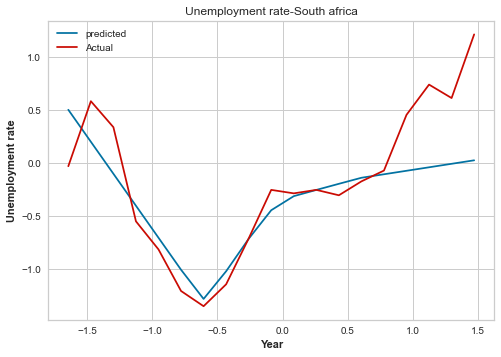

In [38]:
pred_values=model.predict(x_scaled)
plt.plot(x_scaled[:-1],pred_values[:-1],'b')
plt.plot(x_scaled[:-1],y_scaled[:-1],'r')
plt.title('Unemployment rate-South africa')
plt.legend(labels=['predicted', 'Actual'])
plt.xlabel('Year', fontweight ='bold') 
plt.ylabel('Unemployment rate', fontweight ='bold')

In [39]:
rmse = np.sqrt(mean_squared_error(pred_values[:-1],y_scaled[:-1]))
r2 = r2_score(y_scaled[:-1],pred_values[:-1])
print(rmse)
print(r2)

0.4258552101533487
0.6130180124699856


In [40]:
sc_x=StandardScaler()
sc_x.fit_transform(x)
sc_y=StandardScaler()
sc_y.fit_transform(y)
y_pred = sc_y.inverse_transform ((model.predict (sc_x.transform(np.array([[2020]])))))

In [41]:
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]
y_svr_pred=regressor.predict(x_train)
rmse = np.sqrt(mean_squared_error(regressor.predict(x_train),y_train))
r2 = r2_score(y_train,regressor.predict(x_train))
print("rmse",rmse)
print("r2",r2)

rmse 1.0466114320598248
r2 -2.5248322758558124


In [42]:
y_pred[0]

array([25.68313], dtype=float32)

**predicted value for the year-2020**